# **INTRODUCTION TO PANDAS**
---
<img src="http://www.doc.ic.ac.uk/~afd/images/logo_imperial_college_london.png" align = "left" width=200>
 <br><br><br><br>
 
- Copyright (c) Antoine Jacquier, 2022. All rights reserved

- Author: Jack Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

 **Origins**
 
 `pandas` was originally developed by [Wes McKinney](https://wesmckinney.com) while at AQR Capital in 2007-2010.

# Introduction to DataFrames

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## Create a Dataframe with dates

We start by creating series of Gaussian distributed values.

In [3]:
N = 10000 ## size of the dataframe

In [4]:
xx = np.random.standard_normal((N, 5))
df = pd.DataFrame(xx)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head() ## Print the top five rows

,0,1,2,3,4
0,-1.185225,-0.432459,-0.930772,-0.444236,2.715638
1,0.074596,0.737836,-0.042033,0.615378,1.041118
2,1.820451,-0.829519,-0.533592,0.079130,-0.338118
3,0.402523,-3.431308,-0.234431,0.269451,-0.707448
4,-0.578479,-0.454762,2.765510,-0.959842,-1.192877


In [7]:
df.tail() ## Print the bottom five rows

,0,1,2,3,4
9995,-0.924375,-0.279393,-2.578315,1.251906,1.504079
9996,0.091271,-0.174160,-0.311585,-0.381083,1.241198
9997,-0.401979,0.237689,2.053521,-1.970838,-0.842021
9998,-0.525454,-1.354948,-0.432670,-0.901390,-0.277830
9999,-1.582074,0.559540,-0.523086,0.053440,-0.113646


In [8]:
df.columns = ["Series 1", "Series 2", "Series 3", "Series 4", "Series 5"]
## Or more concisely:
#df.columns = ["Series %s" % i  for i in range(1,6)]
df.head()

,Series 1,Series 2,Series 3,Series 4,Series 5
0,-1.185225,-0.432459,-0.930772,-0.444236,2.715638
1,0.074596,0.737836,-0.042033,0.615378,1.041118
2,1.820451,-0.829519,-0.533592,0.079130,-0.338118
3,0.402523,-3.431308,-0.234431,0.269451,-0.707448
4,-0.578479,-0.454762,2.765510,-0.959842,-1.192877


Note that the index (first column on the left) has no real meaning here. 
However, in practice, thinking or each other column as time series, it may represent dates. 
We re-index the whole dataframe with this in mind.

#### Specifying a start date

Use the `date` type instead of strings.

In [9]:
startYear = '2018'
startMonth = '01'
startDay = '01'
startDate = startYear + "-" + startMonth + "-" + startDay ## string concatenation
print("Start date: ", startDate)

Start date:  2018-01-01


In [10]:
dates = pd.date_range(startDate, periods=N, freq="D")
df.index = dates
df.index.name = 'Date'
df.head()

,Series 1,Series 2,Series 3,Series 4,Series 5
Date,,,,,
2018-01-01,-1.185225,-0.432459,-0.930772,-0.444236,2.715638
2018-01-02,0.074596,0.737836,-0.042033,0.615378,1.041118
2018-01-03,1.820451,-0.829519,-0.533592,0.079130,-0.338118
2018-01-04,0.402523,-3.431308,-0.234431,0.269451,-0.707448
2018-01-05,-0.578479,-0.454762,2.765510,-0.959842,-1.192877


## Basic dataframe manipulations

In [11]:
df.keys()

Index(['Series 1', 'Series 2', 'Series 3', 'Series 4', 'Series 5'], dtype='object')

An Index is a `pandas` class for an immutable sequence, which is the basis for axes.

In [12]:
print('Names of columns:', [d for d in df.keys().values])
## similarly df.columns

Names of columns: ['Series 1', 'Series 2', 'Series 3', 'Series 4', 'Series 5']


Overview of the data:

**Convenient for checking existence of nulls!**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2018-01-01 to 2045-05-18
Freq: D
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Series 1  10000 non-null  float64
 1   Series 2  10000 non-null  float64
 2   Series 3  10000 non-null  float64
 3   Series 4  10000 non-null  float64
 4   Series 5  10000 non-null  float64
dtypes: float64(5)
memory usage: 468.8 KB


Basic statistics

In [14]:
df.describe()

,Series 1,Series 2,Series 3,Series 4,Series 5
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.000816,-0.006140,-0.008694,0.014223,0.007999
std,1.001650,1.007617,0.998871,0.994533,0.998398
min,-3.695271,-3.999401,-3.903763,-3.384530,-4.008932
25%,-0.679359,-0.674069,-0.683945,-0.667621,-0.673879
50%,-0.011574,0.005124,-0.005549,0.018704,0.015266
75%,0.670705,0.669739,0.667059,0.703666,0.685215
max,4.419912,3.605134,3.549990,3.876187,3.873119


## Accessing elements from a dataframe

A  DataFrame may be indexed like an array, specifying the row and column number using .iloc (index location).

The location can be called either by the **index number (`iloc`)** or **by its name (`loc`)**.

In [15]:
df.head()

,Series 1,Series 2,Series 3,Series 4,Series 5
Date,,,,,
2018-01-01,-1.185225,-0.432459,-0.930772,-0.444236,2.715638
2018-01-02,0.074596,0.737836,-0.042033,0.615378,1.041118
2018-01-03,1.820451,-0.829519,-0.533592,0.079130,-0.338118
2018-01-04,0.402523,-3.431308,-0.234431,0.269451,-0.707448
2018-01-05,-0.578479,-0.454762,2.765510,-0.959842,-1.192877


In [16]:
print("First row, second column: ", df.iloc[0, 1], " or ", df.loc[startDate, 'Series 2'])

First row, second column:  -0.4324588312673506  or  -0.4324588312673506


In [17]:
myRow = df.iloc[2,:]
print(myRow)
print("Type: ", type(myRow))

Series 1    1.820451
Series 2   -0.829519
Series 3   -0.533592
Series 4    0.079130
Series 5   -0.338118
Name: 2018-01-03 00:00:00, dtype: float64
Type:  <class 'pandas.core.series.Series'>


Equivalently:

In [18]:
myRow = df.loc['2018-01-03']
print(myRow, type(myRow))

Series 1    1.820451
Series 2   -0.829519
Series 3   -0.533592
Series 4    0.079130
Series 5   -0.338118
Name: 2018-01-03 00:00:00, dtype: float64 <class 'pandas.core.series.Series'>


In [19]:
print("Accessing elements by slicing over columns: ")
print(df.iloc[0, 1:3])
print(type(df.iloc[0, 1:3]))

Accessing elements by slicing over columns: 
Series 2   -0.432459
Series 3   -0.930772
Name: 2018-01-01 00:00:00, dtype: float64
<class 'pandas.core.series.Series'>


In [20]:
print("Accessing elements by slicing over rows: ")
print(df.iloc[10:14, 1])
print(type(df.iloc[10:14, 1]))

Accessing elements by slicing over rows: 
Date
2018-01-11    1.974810
2018-01-12   -0.483024
2018-01-13    1.294731
2018-01-14    1.338764
Freq: D, Name: Series 2, dtype: float64
<class 'pandas.core.series.Series'>


In [21]:
print("Accessing elements by slicing over boths: ")
print(df.iloc[10:14, 1:3])
print(type(df.iloc[10:14, 1:3]))

Accessing elements by slicing over boths: 
            Series 2  Series 3
Date                          
2018-01-11  1.974810  2.482120
2018-01-12 -0.483024  0.133788
2018-01-13  1.294731  0.990732
2018-01-14  1.338764 -0.566346
<class 'pandas.core.frame.DataFrame'>


Question: What are the types of the following objects:
- df.iloc[2]
- df.iloc[2].values
- [d for d in df.iloc[2]]

In [22]:
print(type(df.iloc[2]))
print(type(df.iloc[2].values))
print(type([d for d in df.iloc[2]]))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'list'>


### `.at` and `.iat`

These two commands are very similar to `.loc` and `.iloc`, and are actually **faster, but slicing is not permitted.**

In [23]:
%timeit df.iloc[10, 2]
%timeit df.iat[10, 2]

9.25 µs ± 29.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
7.44 µs ± 11.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [24]:
df.iat[10, 2:4]

ValueError: iAt based indexing can only have integer indexers

### Extract elements with conditions

In [26]:
mySeriesName = "Series 2"
df[df[mySeriesName] > 3.4]

,Series 1,Series 2,Series 3,Series 4,Series 5
Date,,,,,
2037-08-27,-0.568096,3.405488,0.517297,0.684395,-0.683123
2042-08-03,-1.045534,3.605134,-1.096578,-0.326590,-1.305871


Note that the series `df` has not been modified. Only a copy has been printed!!

In [27]:
mySeries =  df[mySeriesName][df[mySeriesName] > 3.4]
mySeries

Date
2037-08-27    3.405488
2042-08-03    3.605134
Name: Series 2, dtype: float64

We can return the series only as a list:

In [28]:
print(mySeries.values)

[3.40548752 3.60513447]


### User-defined functions

In [29]:
df = 2.*df
df.head()

,Series 1,Series 2,Series 3,Series 4,Series 5
Date,,,,,
2018-01-01,-2.370450,-0.864918,-1.861544,-0.888472,5.431275
2018-01-02,0.149192,1.475671,-0.084066,1.230755,2.082235
2018-01-03,3.640903,-1.659039,-1.067184,0.158260,-0.676236
2018-01-04,0.805045,-6.862616,-0.468861,0.538903,-1.414896
2018-01-05,-1.156959,-0.909525,5.531020,-1.919684,-2.385755


Here, the original dataframe has been modified!

In [30]:
def myFunction(x, params):
    return x + params[0] * params[1]

p = [10,2]
df[mySeriesName] = df[mySeriesName].apply(myFunction, args=(p,))
df.head()

,Series 1,Series 2,Series 3,Series 4,Series 5
Date,,,,,
2018-01-01,-2.370450,19.135082,-1.861544,-0.888472,5.431275
2018-01-02,0.149192,21.475671,-0.084066,1.230755,2.082235
2018-01-03,3.640903,18.340961,-1.067184,0.158260,-0.676236
2018-01-04,0.805045,13.137384,-0.468861,0.538903,-1.414896
2018-01-05,-1.156959,19.090475,5.531020,-1.919684,-2.385755


#### **What if there are two parameters?!**

## Numpy on dataframe

This is where the power of the DataFrame comes into the picture, namely that operations need to be performed element by element, 
but apply to a whole series (column) at once.

In [31]:
myIndex = input("Series index")

In [32]:
ser = 'Series ' + myIndex
print('Maximum on the first Series:', df[ser].max())
print('Date (index) where this maximum is attained:', df[ser].argmax()) ## deprecated
print('Date where this maximum is attained:', df[ser].idxmax(), df.index[df[ser].argmax()])
print('Mean of the first series:', df[ser].mean())

Maximum on the first Series: 7.099980762746178
Date (index) where this maximum is attained: 1897
Date where this maximum is attained: 2023-03-13 00:00:00 2023-03-13 00:00:00
Mean of the first series: -0.017387661993972542


We can also obtain general results about the whole dataframe / each series in the dataframe:

In [33]:
df.mean()

Series 1    -0.001633
Series 2    19.987720
Series 3    -0.017388
Series 4     0.028445
Series 5     0.015997
dtype: float64

## Plotting Dataframes

##### Plot all the time series

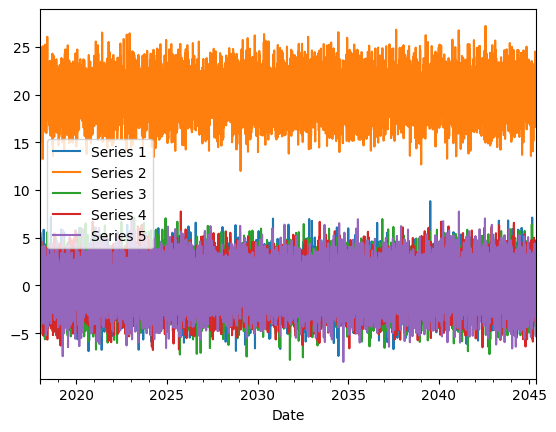

In [34]:
df.plot();

**WHAT IS WRONG ABOUT THE PLOT?**

##### Plot one column at a time

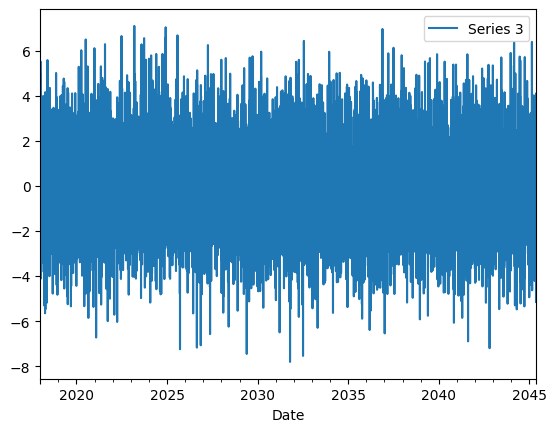

In [35]:
df[ser].plot(legend=ser);

##### Changing the type of plots

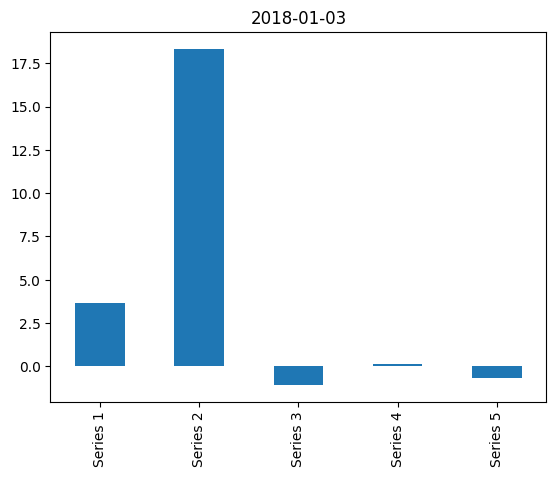

In [36]:
datePlot = '2018-01-03'
df.loc[datePlot].plot(kind='bar', title=datePlot); ## for one particular day

## Sorting DataFrames

In [37]:
print('Data sorted by ' + ser)
df.sort_values(by=ser).head()

Data sorted by Series 3


,Series 1,Series 2,Series 3,Series 4,Series 5
Date,,,,,
2031-10-16,0.054086,18.234798,-7.807525,-2.715617,2.114992
2032-07-04,-0.643199,17.104207,-7.540605,2.482089,-2.033103
2029-05-26,0.702738,24.695309,-7.453327,4.362634,-1.690040
2025-09-19,-3.915989,22.772638,-7.244689,1.081674,-1.632520
2042-10-21,-0.638521,17.141440,-7.199476,0.685407,-3.987174


*WARNING: the dataframe df itself has remained unchanged though...*

In [38]:
df.head()

,Series 1,Series 2,Series 3,Series 4,Series 5
Date,,,,,
2018-01-01,-2.370450,19.135082,-1.861544,-0.888472,5.431275
2018-01-02,0.149192,21.475671,-0.084066,1.230755,2.082235
2018-01-03,3.640903,18.340961,-1.067184,0.158260,-0.676236
2018-01-04,0.805045,13.137384,-0.468861,0.538903,-1.414896
2018-01-05,-1.156959,19.090475,5.531020,-1.919684,-2.385755


## Renaming columns

In [39]:
# df.rename(columns={'Series 1': 'SPX', 
#                    'Series 2': 'DAX', 
#                    'Series 3': 'GOOGL', 
#                    'Series 4': 'AAPL', 
#                    'Series 5': 'VIX'}, inplace=True)
df.columns = ['SPX', 'DAX', 'GOOGL', 'AAPL', 'VIX'] # same effect
# df.rename(columns={'Col1': 'Col1_newname'},inplace=True) # but by using rename you can change only 1 column!
df.head()

,SPX,DAX,GOOGL,AAPL,VIX
Date,,,,,
2018-01-01,-2.370450,19.135082,-1.861544,-0.888472,5.431275
2018-01-02,0.149192,21.475671,-0.084066,1.230755,2.082235
2018-01-03,3.640903,18.340961,-1.067184,0.158260,-0.676236
2018-01-04,0.805045,13.137384,-0.468861,0.538903,-1.414896
2018-01-05,-1.156959,19.090475,5.531020,-1.919684,-2.385755


### A note on copies on slices....

In [40]:
df.head()

,SPX,DAX,GOOGL,AAPL,VIX
Date,,,,,
2018-01-01,-2.370450,19.135082,-1.861544,-0.888472,5.431275
2018-01-02,0.149192,21.475671,-0.084066,1.230755,2.082235
2018-01-03,3.640903,18.340961,-1.067184,0.158260,-0.676236
2018-01-04,0.805045,13.137384,-0.468861,0.538903,-1.414896
2018-01-05,-1.156959,19.090475,5.531020,-1.919684,-2.385755


In [41]:
val = df.iloc[1,0]
val

0.14919191129050471

In [42]:
df[df["SPX"] == val]["DAX"] = 0.
df

/var/folders/zr/fgntnd8166vbjcz3v3pjw4cm0000gn/T/ipykernel_31082/3746132791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["SPX"] == val]["DAX"] = 0.


,SPX,DAX,GOOGL,AAPL,VIX
Date,,,,,
2018-01-01,-2.370450,19.135082,-1.861544,-0.888472,5.431275
2018-01-02,0.149192,21.475671,-0.084066,1.230755,2.082235
2018-01-03,3.640903,18.340961,-1.067184,0.158260,-0.676236
2018-01-04,0.805045,13.137384,-0.468861,0.538903,-1.414896
2018-01-05,-1.156959,19.090475,5.531020,-1.919684,-2.385755
...,...,...,...,...,...
2045-05-14,-1.848750,19.441214,-5.156629,2.503811,3.008159
2045-05-15,0.182542,19.651680,-0.623170,-0.762166,2.482396
2045-05-16,-0.803958,20.475379,4.107041,-3.941676,-1.684042


In [43]:
df.loc[df["SPX"] == val, "DAX"] = 0.
df

,SPX,DAX,GOOGL,AAPL,VIX
Date,,,,,
2018-01-01,-2.370450,19.135082,-1.861544,-0.888472,5.431275
2018-01-02,0.149192,0.000000,-0.084066,1.230755,2.082235
2018-01-03,3.640903,18.340961,-1.067184,0.158260,-0.676236
2018-01-04,0.805045,13.137384,-0.468861,0.538903,-1.414896
2018-01-05,-1.156959,19.090475,5.531020,-1.919684,-2.385755
...,...,...,...,...,...
2045-05-14,-1.848750,19.441214,-5.156629,2.503811,3.008159
2045-05-15,0.182542,19.651680,-0.623170,-0.762166,2.482396
2045-05-16,-0.803958,20.475379,4.107041,-3.941676,-1.684042


# Working with real data

## Financial data from Yahoo Finance

In [44]:
# !pip install pandas_datareader
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data as pdr
from datetime import datetime

`pandas_datareader` is something similar to yahoo-fin, but it can also read data from other sources (e.g. FRED).

In [45]:
ticker = "AAPL"
aapl = pdr.DataReader(ticker, 'yahoo', '1980-01-01')
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.099874
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.094663
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.087715
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.089886
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.092492


In [46]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10578 entries, 1980-12-12 to 2022-11-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       10578 non-null  float64
 1   Low        10578 non-null  float64
 2   Open       10578 non-null  float64
 3   Close      10578 non-null  float64
 4   Volume     10578 non-null  float64
 5   Adj Close  10578 non-null  float64
dtypes: float64(6)
memory usage: 578.5 KB


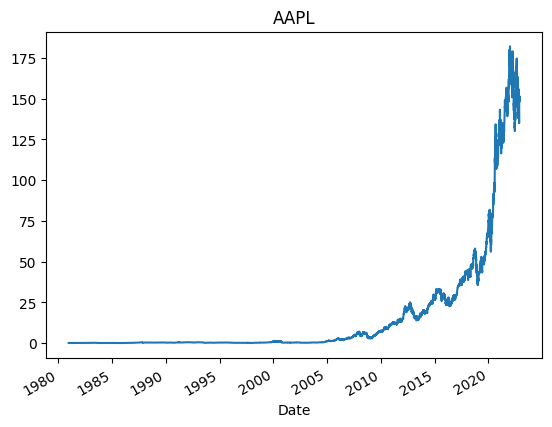

In [47]:
#aapl["Open"][1000:3000].plot(title=ticker)
aapl["Close"].plot(title=ticker)
plt.show()

## Economics Data from FRED

In [48]:
from datetime import date
series_code = 'DGS10' # 10-year Treasury Rate
data_source = 'fred' # FED Economic Data Service
start = date(1962, 1, 1)
myData = pdr.DataReader(series_code, data_source, start)

In [49]:
myData.head()

,DGS10
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


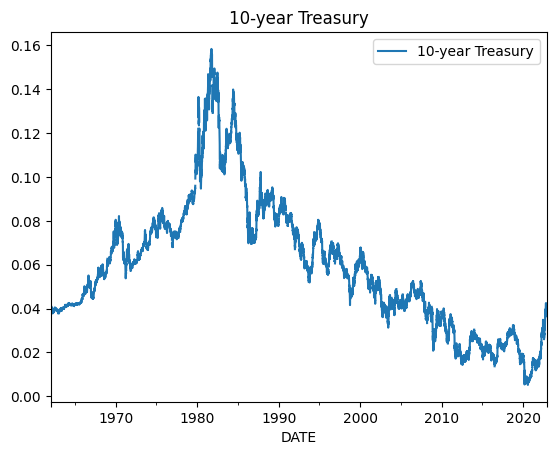

In [50]:
myData = myData / 100.
series_name = '10-year Treasury'
myData = myData.rename(columns={series_code: series_name})
myData.plot(title=series_name)
plt.show() 

## Analysing real data

In [51]:
ticker = "^GSPC" ## S&P500 
spx = pdr.DataReader(ticker, 'yahoo', '1980-01-01')
spx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10818 entries, 1980-01-02 to 2022-11-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       10818 non-null  float64
 1   Low        10818 non-null  float64
 2   Open       10818 non-null  float64
 3   Close      10818 non-null  float64
 4   Volume     10818 non-null  int64  
 5   Adj Close  10818 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 591.6 KB


In [52]:
spx.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-01-02,108.430000,105.290001,0.0,105.760002,40610000,105.760002
1980-01-03,106.080002,103.260002,0.0,105.220001,50480000,105.220001
1980-01-04,107.080002,105.089996,0.0,106.519997,39130000,106.519997
1980-01-07,107.800003,105.800003,0.0,106.809998,44500000,106.809998
1980-01-08,109.290001,106.290001,0.0,108.949997,53390000,108.949997


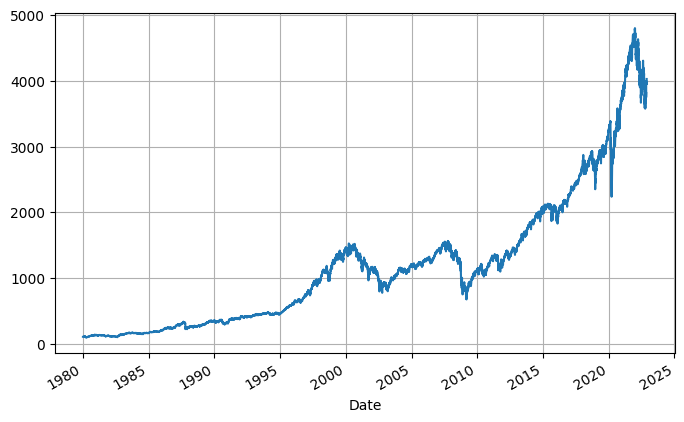

In [53]:
spx['Close'].plot(figsize=(8, 5), grid=True);

This graph shows the leverage effect - volatility is larger when the return is negative.

### A quick note on computation time -- computing daily returns

In [54]:
len(spx)

10818

In [55]:
%%time
spx['ReturnsLoop'] = 0.
for i in range(1, len(spx)):
    spx['ReturnsLoop'][i] = np.log(spx['Close'][i] / spx['Close'][i - 1])

<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 647 ms, sys: 11.9 ms, total: 659 ms
Wall time: 652 ms


In [56]:
spx[['Close', 'ReturnsLoop']].head()

,Close,ReturnsLoop
Date,,
1980-01-02,105.760002,0.000000
1980-01-03,105.220001,-0.005119
1980-01-04,106.519997,0.012279
1980-01-07,106.809998,0.002719
1980-01-08,108.949997,0.019838


In [57]:
%time spx['Returns'] = np.log(spx['Close'] / spx['Close'].shift(1))
spx[['Close', 'Returns']].head()

CPU times: user 948 µs, sys: 360 µs, total: 1.31 ms
Wall time: 1.04 ms


,Close,Returns
Date,,
1980-01-02,105.760002,NaN
1980-01-03,105.220001,-0.005119
1980-01-04,106.519997,0.012279
1980-01-07,106.809998,0.002719
1980-01-08,108.949997,0.019838


In [58]:
del spx['ReturnsLoop']

In [59]:
spx.dropna()
spx.head()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
1980-01-02,108.430000,105.290001,0.0,105.760002,40610000,105.760002,NaN
1980-01-03,106.080002,103.260002,0.0,105.220001,50480000,105.220001,-0.005119
1980-01-04,107.080002,105.089996,0.0,106.519997,39130000,106.519997,0.012279
1980-01-07,107.800003,105.800003,0.0,106.809998,44500000,106.809998,0.002719
1980-01-08,109.290001,106.290001,0.0,108.949997,53390000,108.949997,0.019838


In [60]:
val = df.iloc[0,0]
val

-2.3704502615453364

In [61]:
df[df['SPX'] == val]['DAX'] = 0.
df.head()

/var/folders/zr/fgntnd8166vbjcz3v3pjw4cm0000gn/T/ipykernel_31082/277962909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['SPX'] == val]['DAX'] = 0.


,SPX,DAX,GOOGL,AAPL,VIX
Date,,,,,
2018-01-01,-2.370450,19.135082,-1.861544,-0.888472,5.431275
2018-01-02,0.149192,0.000000,-0.084066,1.230755,2.082235
2018-01-03,3.640903,18.340961,-1.067184,0.158260,-0.676236
2018-01-04,0.805045,13.137384,-0.468861,0.538903,-1.414896
2018-01-05,-1.156959,19.090475,5.531020,-1.919684,-2.385755


In [62]:
df.loc[df['SPX'] == val, 'DAX'] = 0.
df.head()

,SPX,DAX,GOOGL,AAPL,VIX
Date,,,,,
2018-01-01,-2.370450,0.000000,-1.861544,-0.888472,5.431275
2018-01-02,0.149192,0.000000,-0.084066,1.230755,2.082235
2018-01-03,3.640903,18.340961,-1.067184,0.158260,-0.676236
2018-01-04,0.805045,13.137384,-0.468861,0.538903,-1.414896
2018-01-05,-1.156959,19.090475,5.531020,-1.919684,-2.385755


**WHAT IS THE PROBLEM?**

### Data analysis

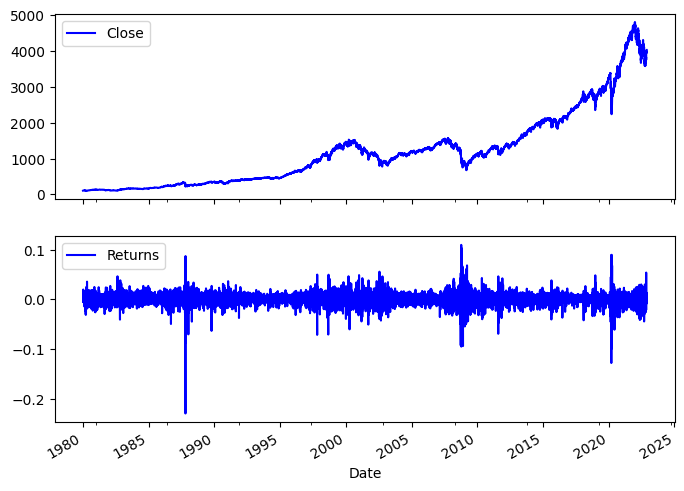

In [63]:
spx[['Close', 'Returns']].plot(subplots=True, style='b',figsize=(8, 6));

**Remarks:**
- Volatility clustering
- Leverage effect

### Moving averages

In [64]:
n1, n2 = 24, 252
MA1, MA2 = 'MA' + str(n1) + 'd', 'MA' + str(n2) + 'd'
spx[MA1] = spx['Close'].rolling(window=n1, center = False).mean()
spx[MA2] = spx['Close'].rolling(window=n2, center = False).mean()
spx.tail()

,High,Low,Open,Close,Volume,Adj Close,Returns,MA24d,MA252d
Date,,,,,,,,,
2022-11-17,3954.330078,3906.540039,3919.260010,3946.560059,4051780000,3946.560059,-0.003094,3828.014608,4185.447511
2022-11-18,3979.889893,3935.979980,3966.389893,3965.340088,4037360000,3965.340088,0.004747,3839.989197,4182.514178
2022-11-21,3962.000000,3933.340088,3956.229980,3949.939941,3850690000,3949.939941,-0.003891,3849.570862,4179.545844
2022-11-22,4005.879883,3956.879883,3965.510010,4003.580078,3887990000,4003.580078,0.013489,3862.421702,4176.849972
2022-11-23,4033.780029,3998.659912,4000.300049,4027.260010,3279720000,4027.260010,0.005897,3877.483368,4174.217273


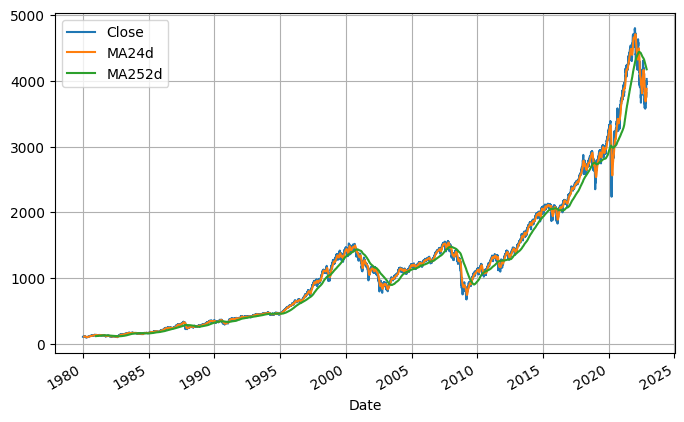

In [65]:
spx[['Close', MA1, MA2]].plot(figsize=(8, 5), grid=True);

In [66]:
spx['MovingReturnsVol'] = spx['Returns'].rolling(window=252).std() * np.sqrt(252.)

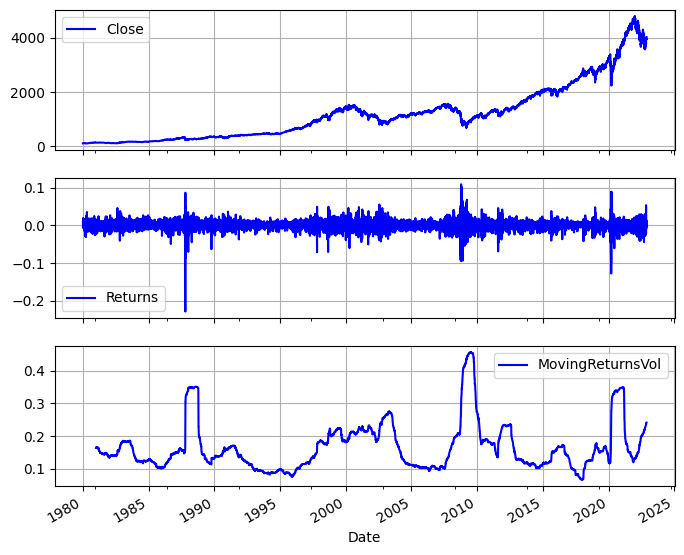

In [67]:
spx[['Close', 'Returns', 'MovingReturnsVol']].plot(subplots=True, style='b',figsize=(8, 7), grid=True);

# The `groupby` command

In [68]:
import pandas as pd

df = pd.read_excel('Class 2022-2023.xlsx')
df.head()

,CID,Prefix,Gender,Nationality,Grade
0,278938960,Mr,Male,France,82
1,630642297,Mr,Male,France,51
2,388408196,Mr,Male,United Kingdom,86
3,22998,Mr,Male,France,57
4,315973934,Ms,Female,China,56


In [69]:
df["Grade"].mean()

70.61818181818182

In [70]:
df["Grade"].sum()# / len(df.index)

3884

In [71]:
df.groupby(['Nationality']).agg({'Grade': 'mean'})

,Grade
Nationality,
Belgium,44.000000
China,68.384615
France,68.909091
Germany,93.000000
Hong Kong,95.000000
Hungary,43.000000
Iran,85.000000
Ireland,85.500000
Italy,70.000000


In [72]:
df.groupby(['Nationality']).agg({'Grade': 'sum'})

,Grade
Nationality,
Belgium,44
China,1778
France,758
Germany,93
Hong Kong,95
Hungary,43
Iran,85
Ireland,171
Italy,140


In [73]:
df.groupby(['Nationality', 'Gender']).agg({'Grade': 'sum'}).sum()

Grade    3525
dtype: int64

**WHAT IS HAPPENING????**

Because there are nulls in gender.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CID          55 non-null     int64 
 1   Prefix       55 non-null     object
 2   Gender       51 non-null     object
 3   Nationality  55 non-null     object
 4   Grade        55 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.3+ KB


# Merge, join, concatenate data -- an example with the MTA database

NYC map: https://www.google.com/maps/place/New+York,+NY,+USA/@40.6976684,-74.2605634,10z/data=!3m1!4b1!4m5!3m4!1s0x89c24fa5d33f083b:0xc80b8f06e177fe62!8m2!3d40.7127753!4d-74.0059728


Data: http://web.mta.info/developers/turnstile.html



### Importing and looking at the data

In [75]:
import datetime as dt
import pandas as pd

In [76]:
url  = r'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180825.txt'
df = pd.read_csv(url)#, index_col=0, header=0, parse_dates=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197380 entries, 0 to 197379
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   197380 non-null  object
 1   UNIT                                                                  197380 non-null  object
 2   SCP                                                                   197380 non-null  object
 3   STATION                                                               197380 non-null  object
 4   LINENAME                                                              197380 non-null  object
 5   DIVISION                                                              197380 non-null  object
 6   DATE                                                                  197380 non-null  objec

In [78]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,00:00:00,REGULAR,6728354,2280604
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,04:00:00,REGULAR,6728373,2280609
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,08:00:00,REGULAR,6728388,2280634
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,12:00:00,REGULAR,6728469,2280669
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,16:00:00,REGULAR,6728665,2280681


In [79]:
!pip install xlrd

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [80]:
url  = r'http://web.mta.info/developers/resources/nyct/turnstile/Remote-Booth-Station.xls'
infoStations = pd.read_excel(url)#, index_col=0, header=0, parse_dates=True)
infoStations.head()

,Remote,Booth,Station,Line Name,Division
0,R001,A060,WHITEHALL ST,R1,BMT
1,R001,A058,WHITEHALL ST,R1,BMT
2,R001,R101S,SOUTH FERRY,R1,IRT
3,R002,A077,FULTON ST,ACJZ2345,BMT
4,R002,A081,FULTON ST,ACJZ2345,BMT


### Cleaning the data

In [81]:
df['ENTRIES'].max()

2129780411

In [82]:
df['EXITS'].max()

KeyError: 'EXITS'

In [83]:
df.keys()

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [84]:
df.columns = ['ca', 'unit', 'scp', 'station', 'linename', 'division', 'date','time', 'desc', 'entries','exits']

In [85]:
df['exits'].max()

2062568997

In [86]:
#df["date"] = pd.to_datetime(df["date"] + " " + df["time"])
df["date"] = pd.to_datetime(df["date"])
df.head()

,ca,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-18,00:00:00,REGULAR,6728354,2280604
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-18,04:00:00,REGULAR,6728373,2280609
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-18,08:00:00,REGULAR,6728388,2280634
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-18,12:00:00,REGULAR,6728469,2280669
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-18,16:00:00,REGULAR,6728665,2280681


### Counting daily traffic using `groupby`

In [87]:
df_entries = df.groupby(['station','ca','unit','scp','date']).entries.max() - df.groupby(['station','ca','unit','scp','date']).entries.min()
df_exits = df.groupby(['station','ca','unit','scp','date']).exits.max() - df.groupby(['station','ca','unit','scp','date']).exits.min()
print("Types: ", type(df_entries), type(df_exits))

Types:  <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [88]:
df_entries

station    ca    unit  scp       date      
1 AV       H007  R248  00-00-00  2018-08-18    1759
                                 2018-08-19    1461
                                 2018-08-20    2704
                                 2018-08-21    3002
                                 2018-08-22    3033
                                               ... 
ZEREGA AV  R419  R326  00-05-01  2018-08-20       0
                                 2018-08-21       0
                                 2018-08-22       0
                                 2018-08-23       0
                                 2018-08-24       0
Name: entries, Length: 32559, dtype: int64

We are now going to merge `df_entries` and `df_exits`. However, they need to have the same index.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [89]:
df_entries_flat = df_entries.reset_index()
df_exits_flat = df_exits.reset_index()

df_traffic = pd.merge(df_entries_flat, df_exits_flat, how='outer')

df_traffic['day'] = df_traffic['date'].dt.day_name()
df_traffic['traffic'] = df_traffic['entries'] + df_traffic['exits']

In [90]:
df_traffic.head()

,station,ca,unit,scp,date,entries,exits,day,traffic
0,1 AV,H007,R248,00-00-00,2018-08-18,1759,2377,Saturday,4136
1,1 AV,H007,R248,00-00-00,2018-08-19,1461,2074,Sunday,3535
2,1 AV,H007,R248,00-00-00,2018-08-20,2704,3417,Monday,6121
3,1 AV,H007,R248,00-00-00,2018-08-21,3002,3488,Tuesday,6490
4,1 AV,H007,R248,00-00-00,2018-08-22,3033,3451,Wednesday,6484


In [91]:
df_traffic.describe()

,entries,exits,traffic
count,3.255900e+04,3.255900e+04,3.255900e+04
mean,5.585258e+04,6.098161e+04,1.168342e+05
std,8.218440e+06,1.011603e+07,1.828231e+07
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.170000e+02,1.220000e+02,5.010000e+02
50%,6.680000e+02,4.150000e+02,1.251000e+03
75%,1.312000e+03,9.395000e+02,2.286000e+03
max,1.448534e+09,1.821581e+09,3.270114e+09


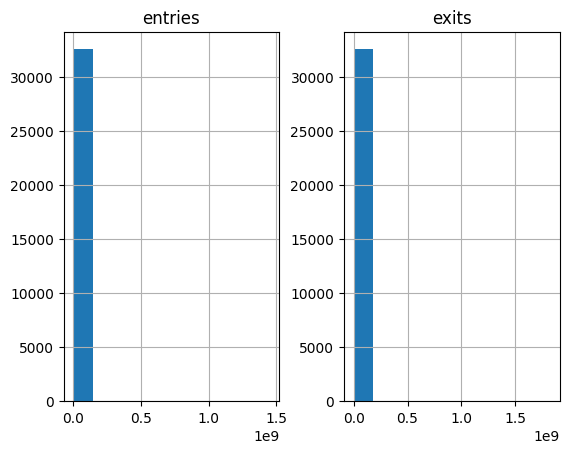

In [92]:
df_traffic[["entries", "exits"]].hist();

In [93]:
thresholdMax = 25000
df_traffic = df_traffic[df_traffic["traffic"] < thresholdMax]

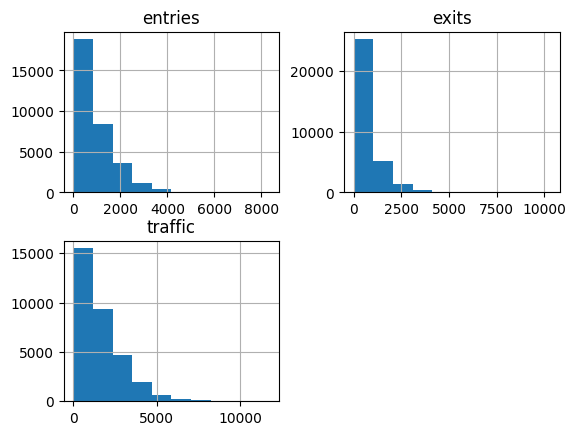

In [94]:
df_traffic[["entries", "exits", "traffic"]].hist();

Final steps

In [95]:
df_station = df_traffic.groupby(['station','date','day']).sum().reset_index()
df_station.head()

,station,date,day,entries,exits,traffic
0,1 AV,2018-08-18,Saturday,10105,11904,22009
1,1 AV,2018-08-19,Sunday,8349,10070,18419
2,1 AV,2018-08-20,Monday,14392,16478,30870
3,1 AV,2018-08-21,Tuesday,15023,16567,31590
4,1 AV,2018-08-22,Wednesday,15377,17217,32594


### What happens at Penn station?

In [96]:
df_station["station"].unique()

array(['1 AV', '103 ST', '103 ST-CORONA', '104 ST', '110 ST', '111 ST',
       '116 ST', '116 ST-COLUMBIA', '121 ST', '125 ST', '135 ST',
       '137 ST CITY COL', '138/GRAND CONC', '14 ST', '14 ST-UNION SQ',
       '145 ST', '149/GRAND CONC', '14TH STREET', '15 ST-PROSPECT',
       '155 ST', '157 ST', '161/YANKEE STAD', '167 ST', '168 ST',
       '169 ST', '170 ST', '174 ST', '175 ST', '176 ST', '18 AV', '18 ST',
       '181 ST', '182-183 STS', '183 ST', '190 ST', '191 ST', '2 AV',
       '20 AV', '207 ST', '21 ST', '21 ST-QNSBRIDGE', '215 ST', '219 ST',
       '225 ST', '23 ST', '231 ST', '233 ST', '238 ST', '25 AV', '25 ST',
       '28 ST', '3 AV', '3 AV 138 ST', '3 AV-149 ST', '30 AV', '33 ST',
       '33 ST-RAWSON ST', '34 ST-HERALD SQ', '34 ST-HUDSON YD',
       '34 ST-PENN STA', '36 AV', '36 ST', '4 AV-9 ST', '40 ST LOWERY ST',
       '42 ST-BRYANT PK', '42 ST-PORT AUTH', '45 ST', '46 ST',
       '46 ST BLISS ST', '47-50 STS ROCK', '49 ST', '4AV-9 ST',
       '5 AV/53 ST', '5 AV

In [97]:
len(df_station["station"].unique())

373

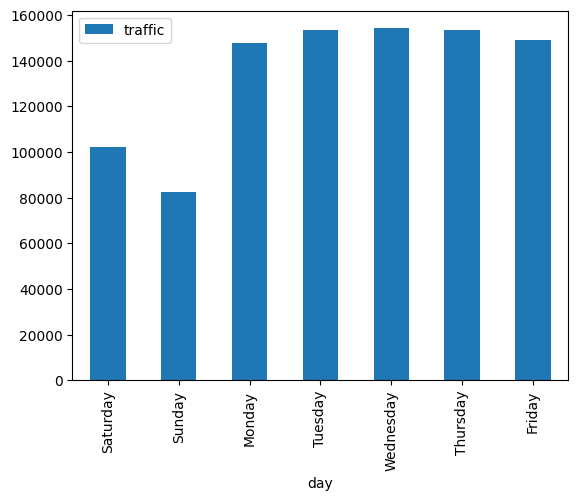

In [98]:
df_Penn = df_station[df_station["station"] == "42 ST-PORT AUTH"]
df_Penn
df_Penn.plot.bar(x="day", y="traffic");

### Exercise

- What are the 3 busiest stations on average?
- What is the traffic distribution over the week?
- What are the busiest stations on weekends and on weekdays?

In [99]:
volume = df_station.groupby(['station']).sum()
volume = volume.sort_values(by='traffic',ascending=False)
# volume
volume.iloc[0:3,].index

Index(['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ'], dtype='object', name='station')

In [100]:
vol_week = df_station.groupby(['day']).sum()
vol_week = vol_week.sort_values(by='traffic')
vol_week

,entries,exits,traffic
day,,,
Sunday,2019140,1661615,3680755
Saturday,2502485,2024880,4527365
Monday,4687745,3594252,8281997
Friday,4694064,3610537,8304601
Tuesday,4838750,3719747,8558497
Wednesday,4878547,3746054,8624601
Thursday,4917178,3771905,8689083


<AxesSubplot:xlabel='day'>

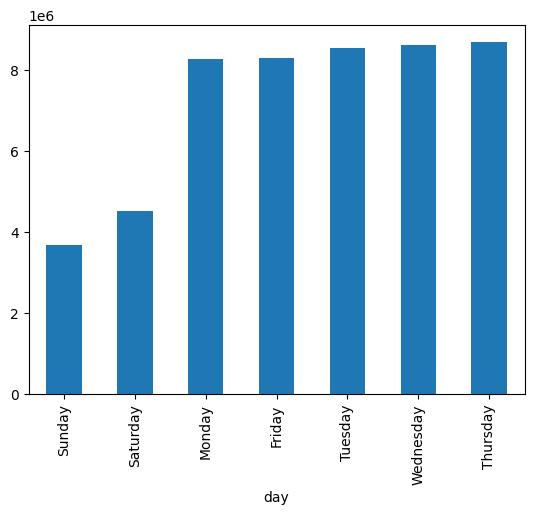

In [101]:
vol_week['traffic'].plot.bar(x='day', y='traffic')

In [102]:
ind_weekend = pd.DataFrame([df_traffic['day']=="Saturday", df_traffic['day']=="Sunday"])
# ind = pd.DataFrame([df_traffic['day']=="Sunday"])
vol_weekends = df_traffic.loc[ind_weekend.any(),].groupby(['station']).sum().sort_values(by='traffic',ascending=False)
vol_weekends

,entries,exits,traffic
station,,,
34 ST-PENN STA,127142,112970,240112
14 ST-UNION SQ,99669,98329,197998
42 ST-PORT AUTH,96998,87594,184592
TIMES SQ-42 ST,85116,96395,181511
34 ST-HERALD SQ,89946,90499,180445
...,...,...,...
NASSAU AV,1,11,12
INTERVALE AV,1,7,8
BROADWAY,2,3,5


In [103]:
ind_weekday = pd.DataFrame([df_traffic['day']!="Saturday", df_traffic['day']!="Sunday"])
# ind = pd.DataFrame([df_traffic['day']=="Sunday"])
vol_weekdays = df_traffic.loc[ind_weekday.all(),].groupby(['station']).sum().sort_values(by='traffic',ascending=False)
vol_weekdays

,entries,exits,traffic
station,,,
34 ST-PENN STA,711692,606018,1317710
GRD CNTRL-42 ST,654258,622922,1277180
34 ST-HERALD SQ,526653,515198,1041851
TIMES SQ-42 ST,407665,425955,833620
FULTON ST,441557,379778,821335
...,...,...,...
BEACH 44 ST,2682,2461,5143
BEACH 105 ST,1973,1905,3878
TOMPKINSVILLE,3400,0,3400


### Exercise

Write a script that imports each weekly file http://web.mta.info/developers/turnstile.html and merges them.

# Common issues of Cleaning Data

In [104]:
xx = [2, 4, 6, '8']
df = pd.DataFrame(xx)
df.columns = ["X"]
df.head()

,X
0,2
1,4
2,6
3,8


In [105]:
df["Mult"] = 2.*df["X"]

TypeError: can't multiply sequence by non-int of type 'float'

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       4 non-null      object
dtypes: object(1)
memory usage: 160.0+ bytes


**Object type means there are more than 1 type..?**

In [107]:
df['X'] = pd.to_numeric(df['X'])
df["Mult"] = 2.*df["X"]

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       4 non-null      int64  
 1   Mult    4 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 192.0 bytes


In [109]:
df.head()

,X,Mult
0,2,4.0
1,4,8.0
2,6,12.0
3,8,16.0


### Working with copies

In [110]:
N = 5
xx = np.random.standard_normal((N, 5))
df = pd.DataFrame(xx)
df2 = df ### same as df.copy(deep=False)
df3 = df.copy(deep=True)

**The `deep` parameter in `copy()` is by default `True`.**

In [111]:
i,j = 0,1
df.iat[i,j] = 2.
print(df.iat[i,j], df2.iat[i,j])

2.0 2.0


In [112]:
i,j = 0,1
df3.iat[i,j] = 5.
print(df.iat[i,j], df3.iat[i,j])

2.0 5.0


### Filling the void

In [118]:
df = pd.read_csv("eurgbp-1m.csv", sep=";")#,header = None)
df.columns=["Date", "Time", "Bid", "Ask", "na", "na2", "na3"]
#df["DateTime"] = df["Date"] + df["Time"]
df = df.drop(columns=['na', 'na2', 'na3'])
df.head()

,0,1,2,3
0,EUR/GBP,20220102 22:06:10.134,0.83823,0.84273
1,EUR/GBP,20220102 22:06:51.626,0.83816,0.84274
2,EUR/GBP,20220102 22:06:51.627,0.83811,0.84275
3,EUR/GBP,20220102 22:06:52.627,0.83829,0.84189
4,EUR/GBP,20220102 22:06:52.839,0.83834,0.84183


**Exercise:** Create a dataframe with one value for the bid and one value for the ask for each day.
For example, using the maximum value of the day.

In [ ]:
import random
chosenDay = df.iloc[random.choice(range(len(df))), 0]
print("Chosen day: ", chosenDay)

In [ ]:
oneDay = df[df["Date"] == chosenDay]
oneDay.set_index("Time", inplace=True)
del oneDay["Date"]
oneDay.plot(title="eurgbp on " + chosenDay);
oneDay.head()

In [ ]:
nbMissingValues = len(oneDay)//3
N = len(oneDay)
listMissingValues = random.choices(range(N), k=nbMissingValues)
for l in listMissingValues:
    oneDay.iat[l, 0] = np.log(-1.)

In [ ]:
oneDay.head()

In [ ]:
oneDay["Bid"].plot()

How do we fill the gaps? 
- `dropna`?
- interpolation? But which one?

In [ ]:
oneDay["Bid"].interpolate(method='linear', axis=0).plot();

# Extra: Combining DataFrames and creating signals

In [ ]:
aapl.tail()

In [ ]:
coke.tail()

In [ ]:
df = pd.merge(coke, aapl, on="Date")
df.tail()

In [ ]:
df = pd.merge(coke["Close"], aapl["Close"], on="Date")
df.columns = ["coke", "aapl"]
df.head()

In [ ]:
df.plot();

#### Normalised versions...

In [ ]:
coke0 = coke.iloc[0,0]
aapl0 = aapl.iloc[0,0]

coke_norm = coke / coke0
aapl_norm = aapl / aapl0
df_norm = pd.merge(coke_norm["Close"], aapl_norm["Close"], on="Date")
df_norm.columns = ["coke norm", "aapl norm"]
df_norm.plot();

In [ ]:
coke = pdr.DataReader("COKE", 'yahoo', '1980-01-01')

In [ ]:
coke["Returns"] = np.log(coke['Close'] / coke['Close'].shift(1))
coke['MovingVol'] = coke['Returns'].rolling(window=252).std() * np.sqrt(252.)
coke = coke[["Close", "Returns", "MovingVol"]]
coke = coke.dropna()
coke["MovingVol"].plot(title="Moving vol");

In [ ]:
maxVolAllowed = 0.4
coke.loc[coke['MovingVol'] > maxVolAllowed, 'Signal'] = 0.6#coke["MovingVol"].max()
coke[["Signal", "MovingVol"]].plot().legend(loc=3);

# WARNINGS: Data inconsistencies

- Missing data
- NaN, -1, ...
- Date format
- Blank spaces
- Formats: Int, float, ...

Remark: `Pandas` is not very useful for big data. Use `Vaex`.